In [1]:
!nvidia-smi

Thu Mar 13 08:24:24 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 570.124.03             Driver Version: 572.60         CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4050 ...    On  |   00000000:01:00.0 Off |                  N/A |
| N/A   45C    P3             12W /   35W |       0MiB /   6141MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
%%time
import cudf

all_train = cudf.read_csv("all_train.csv")
display(all_train.head())
display(all_train.shape)


,# label,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f18,f19,f20,f21,f22,f23,f24,f25,f26,mass
0,1.0,-0.346368,0.416306,0.999236,0.475342,0.427493,-0.005984,1.989833,0.344530,1.566297,...,4.105282,0.267826,0.378718,1.743123,3.406367,4.350537,-0.352571,1.130032,2.227706,1000.0
1,1.0,1.708236,-0.319394,-1.241873,-0.887231,-0.871906,-0.005984,-0.001047,-1.038225,0.655748,...,-1.178141,-0.877361,-1.483769,-0.573682,-1.693781,-0.545062,-0.299118,-0.662942,-0.193019,750.0
2,0.0,-0.360693,1.794174,0.264738,-0.472273,-0.292344,-1.054221,-1.150495,1.423404,1.270098,...,-1.199511,0.539020,-1.590629,-0.573682,-0.543636,-0.937456,-0.300344,-0.523262,-1.506304,750.0
3,1.0,-0.377914,-0.103932,-0.649434,-2.125015,-1.643797,-0.005984,1.011112,-1.040340,-0.541991,...,0.463763,-0.006583,1.089122,-0.573682,-0.276348,-0.409272,-0.349926,-0.307123,0.529698,1250.0
4,0.0,-0.067436,-0.636762,-0.620166,-0.062551,1.588715,-0.005984,-0.595304,-1.238987,0.336844,...,-0.552837,-1.418494,-0.562982,1.743123,0.881802,0.002516,1.560950,-0.150760,-1.023889,750.0


(7000000, 29)

CPU times: user 7.14 s, sys: 1.53 s, total: 8.67 s
Wall time: 22.3 s


In [3]:
%%time
import cudf

all_test = cudf.read_csv("all_test.csv")
display(all_test.head())
display(all_test.shape)


,# label,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f18,f19,f20,f21,f22,f23,f24,f25,f26,mass
0,0.0,0.094394,0.012756,0.911933,-0.090831,-0.233575,-1.054221,-0.975937,-1.067278,-0.613850,...,-1.376865,0.067591,1.372576,-0.573682,-1.368692,-0.479379,1.529256,-0.575782,-1.290232,499.999969
1,1.0,0.327200,-0.239554,-1.592038,-2.324984,-0.507093,1.574625,-1.050106,0.968664,1.312387,...,-0.333943,1.058411,0.436482,-0.573682,-0.021727,-0.579184,-0.326044,-0.202462,-0.458558,750.000000
2,1.0,1.435010,0.400359,0.260659,0.829901,0.453934,-1.054221,1.169220,-0.541082,-1.230714,...,-1.654498,0.928221,0.639820,-0.573682,0.494222,-0.277551,-0.342811,1.774911,0.305253,1000.000000
3,0.0,-1.186220,0.443335,0.003997,0.484752,-1.159905,-1.054221,-1.581964,-0.391629,0.529644,...,-0.520804,-1.241476,-0.137923,-0.573682,-0.254372,-0.253829,0.333148,-0.554347,-0.905452,1000.000000
4,1.0,0.392461,-0.515250,-1.336984,1.895459,-1.068731,-0.005984,1.404694,0.176146,0.700568,...,-0.557441,0.838925,-0.128199,-0.573682,-0.629632,-0.673854,-0.238945,2.118990,0.938224,1250.000000


(3500000, 29)

CPU times: user 4.99 s, sys: 736 ms, total: 5.73 s
Wall time: 12.9 s


# RF without PCA

'Original Training Data (First 5 Rows):'

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f18,f19,f20,f21,f22,f23,f24,f25,f26,mass
0,-0.346368,0.416306,0.999236,0.475342,0.427493,-0.005984,1.989833,0.344530,1.566297,0.754261,...,4.105282,0.267826,0.378718,1.743123,3.406367,4.350537,-0.352571,1.130032,2.227706,1000.0
1,1.708236,-0.319394,-1.241873,-0.887231,-0.871906,-0.005984,-0.001047,-1.038225,0.655748,0.754261,...,-1.178141,-0.877361,-1.483769,-0.573682,-1.693781,-0.545062,-0.299118,-0.662942,-0.193019,750.0
2,-0.360693,1.794174,0.264738,-0.472273,-0.292344,-1.054221,-1.150495,1.423404,1.270098,0.754261,...,-1.199511,0.539020,-1.590629,-0.573682,-0.543636,-0.937456,-0.300344,-0.523262,-1.506304,750.0
3,-0.377914,-0.103932,-0.649434,-2.125015,-1.643797,-0.005984,1.011112,-1.040340,-0.541991,0.754261,...,0.463763,-0.006583,1.089122,-0.573682,-0.276348,-0.409272,-0.349926,-0.307123,0.529698,1250.0
4,-0.067436,-0.636762,-0.620166,-0.062551,1.588715,-0.005984,-0.595304,-1.238987,0.336844,-1.325801,...,-0.552837,-1.418494,-0.562982,1.743123,0.881802,0.002516,1.560950,-0.150760,-1.023889,750.0


'Original Test Data (First 5 Rows):'

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f18,f19,f20,f21,f22,f23,f24,f25,f26,mass
0,0.094394,0.012756,0.911933,-0.090831,-0.233575,-1.054221,-0.975937,-1.067278,-0.613850,0.754261,...,-1.376865,0.067591,1.372576,-0.573682,-1.368692,-0.479379,1.529256,-0.575782,-1.290232,499.999969
1,0.327200,-0.239554,-1.592038,-2.324984,-0.507093,1.574625,-1.050106,0.968664,1.312387,0.754261,...,-0.333943,1.058411,0.436482,-0.573682,-0.021727,-0.579184,-0.326044,-0.202462,-0.458558,750.000000
2,1.435010,0.400359,0.260659,0.829901,0.453934,-1.054221,1.169220,-0.541082,-1.230714,0.754261,...,-1.654498,0.928221,0.639820,-0.573682,0.494222,-0.277551,-0.342811,1.774911,0.305253,1000.000000
3,-1.186220,0.443335,0.003997,0.484752,-1.159905,-1.054221,-1.581964,-0.391629,0.529644,-1.325801,...,-0.520804,-1.241476,-0.137923,-0.573682,-0.254372,-0.253829,0.333148,-0.554347,-0.905452,1000.000000
4,0.392461,-0.515250,-1.336984,1.895459,-1.068731,-0.005984,1.404694,0.176146,0.700568,0.754261,...,-0.557441,0.838925,-0.128199,-0.573682,-0.629632,-0.673854,-0.238945,2.118990,0.938224,1250.000000


'Test Accuracy: 0.8574'

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.83      0.85   1750755
         1.0       0.84      0.88      0.86   1749245

    accuracy                           0.86   3500000
   macro avg       0.86      0.86      0.86   3500000
weighted avg       0.86      0.86      0.86   3500000



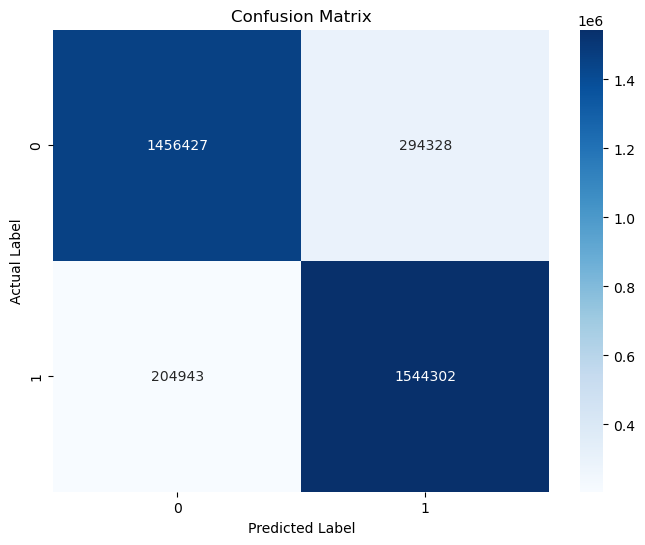

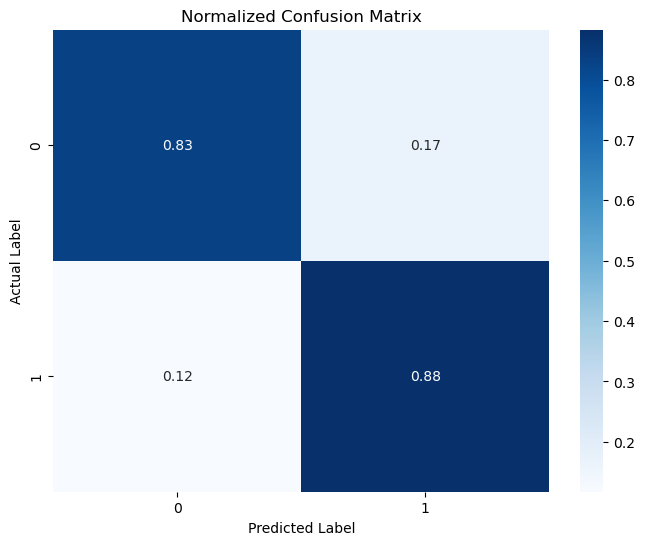

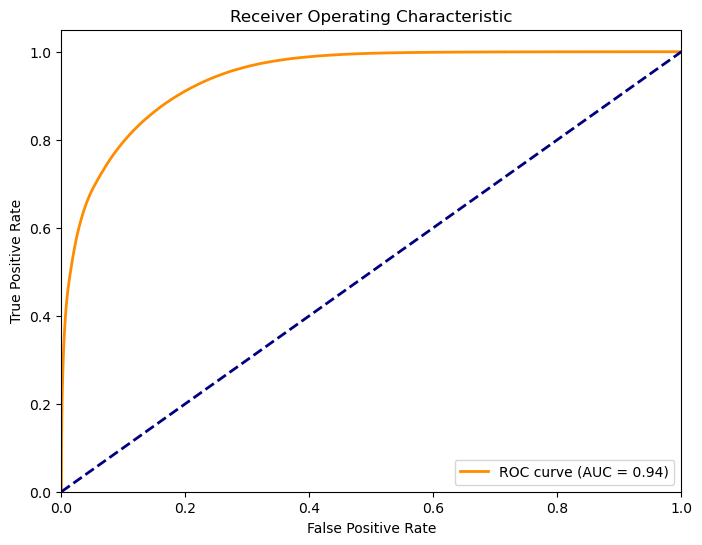

CPU times: user 2min 24s, sys: 1min 55s, total: 4min 19s
Wall time: 1min 16s


In [20]:
%%time
# Import necessary libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

from cuml.ensemble import RandomForestClassifier
from cuml.metrics import accuracy_score

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Separate features and target variable for both training and test datasets
X_train = all_train.drop('# label', axis=1)
y_train = all_train['# label']

X_test = all_test.drop('# label', axis=1)
y_test = all_test['# label']

# Display original data samples
display("Original Training Data (First 5 Rows):", X_train.head())
display("Original Test Data (First 5 Rows):", X_test.head())

# Initialize and train Random Forest classifier on original data
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
display(f"Test Accuracy: {accuracy:.4f}")

# ----------------------------
# Additional Metrics
# ----------------------------
# Convert predictions and true labels to pandas (if they are cudf)
y_test_pd = y_test.to_pandas() if hasattr(y_test, "to_pandas") else y_test
y_pred_pd = y_pred.to_pandas() if hasattr(y_pred, "to_pandas") else y_pred

# Classification report (includes precision, recall, and f1 score per class)
print("Classification Report:")
print(classification_report(y_test_pd, y_pred_pd))

# Confusion Matrix
cm = confusion_matrix(y_test_pd, y_pred_pd)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.show()

# Normalize the confusion matrix by row (actual class totals)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8,6))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap='Blues')
plt.title("Normalized Confusion Matrix")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.show()

# ----------------------------
# ROC-AUC Computation and Plotting
# ----------------------------
# Get predicted probabilities from the model on original data
y_proba = rf.predict_proba(X_test)

# Convert to a pandas DataFrame if necessary
if hasattr(y_proba, "to_pandas"):
    y_proba = y_proba.to_pandas()

# Assuming binary classification, extract probabilities for the positive class
y_score = y_proba.iloc[:, 1]

# Ensure y_test is in pandas format
if hasattr(y_test, "to_pandas"):
    y_test_pd = y_test.to_pandas()
else:
    y_test_pd = y_test

# Compute ROC metrics
fpr, tpr, thresholds = roc_curve(y_test_pd, y_score)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# RF with PCA

'Principal Components:'

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.000360,-1.423876e-07,4.770745e-07,0.000573,6.521739e-09,0.000183,0.000866,-1.938028e-07,0.000002,0.000158,...,0.000332,-6.724678e-07,-7.834031e-07,-0.000082,0.000164,0.000442,0.000147,0.000707,0.000899,0.999998
1,-0.157009,-5.073117e-04,1.222920e-04,-0.212297,-9.797292e-05,-0.162314,-0.382532,-4.828304e-04,-0.000161,0.043168,...,-0.321811,-1.949356e-04,-1.123711e-04,-0.039747,-0.197664,-0.273876,-0.098793,-0.257593,-0.403264,0.001802


'Explained Variance Ratio:'

0    0.999788
1    0.000034
dtype: float64

'Transformed Training Data (First 5 Rows):'

,0,1,# label
0,-0.095724,-7.355219,1.0
1,-250.108354,0.639588,1.0
2,-250.112100,2.405058,0.0
3,249.892981,0.033867,1.0
4,-250.108892,0.203114,0.0


'Transformed Test Data (First 5 Rows):'

,0,1,# label
0,-500.110389,1.614034,0.0
1,-250.110387,1.326763,1.0
2,-0.105539,0.075982,1.0
3,-0.111987,2.328006,0.0
4,249.897643,-1.839672,1.0


'Test Accuracy: 0.8017'

Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.78      0.80   1750755
         1.0       0.79      0.82      0.81   1749245

    accuracy                           0.80   3500000
   macro avg       0.80      0.80      0.80   3500000
weighted avg       0.80      0.80      0.80   3500000



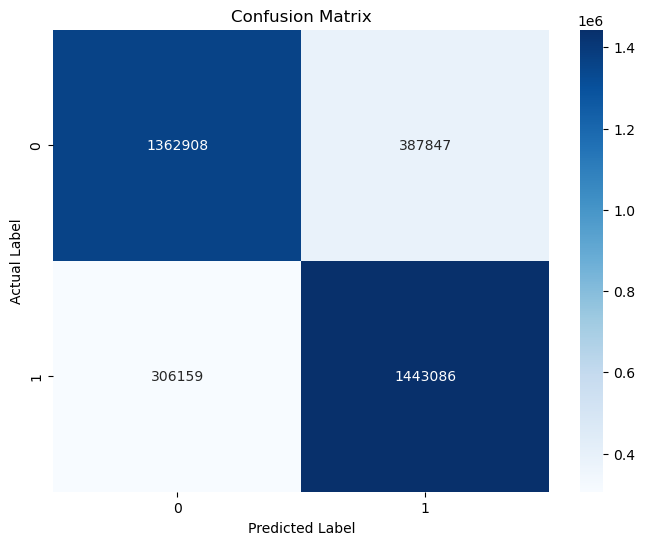

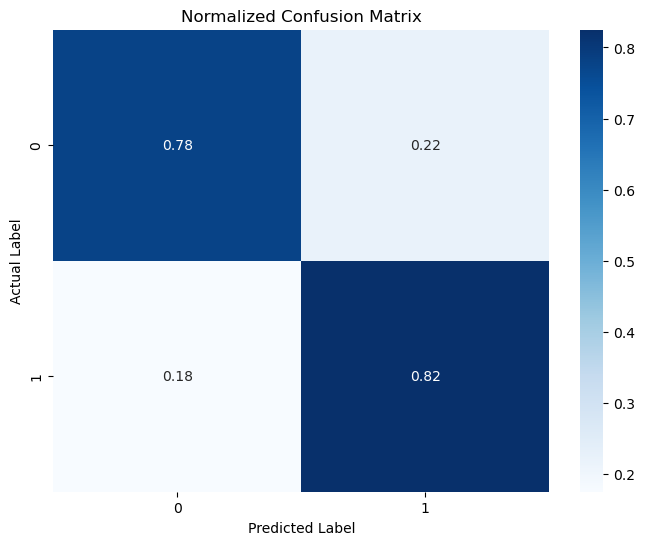

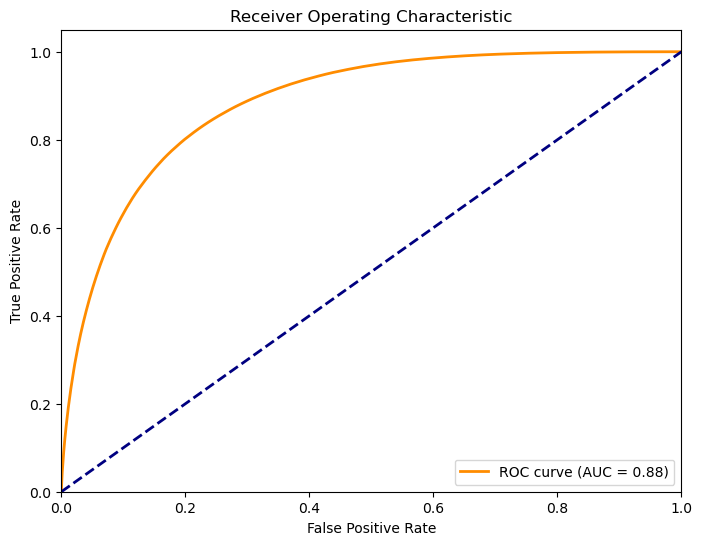

CPU times: user 51.2 s, sys: 31.6 s, total: 1min 22s
Wall time: 31.1 s


In [30]:
%%time
# Import necessary libraries
from cuml import PCA
from cuml.ensemble import RandomForestClassifier
from cuml.metrics import accuracy_score
from IPython.display import display

# Additional imports for metrics and plotting
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Separate features and target variable for both training and test datasets
X_train = all_train.drop('# label', axis=1)
y_train = all_train['# label']

X_test = all_test.drop('# label', axis=1)
y_test = all_test['# label']

# Initialize PCA model with 2 components (adjust n_components as needed)
pca = PCA(n_components=2, output_type='cudf')

# Fit PCA on the training features
pca.fit(X_train)

# Transform both training and test data
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Safe: Create copies before adding labels to avoid label leaks
train_pca_df = X_train_pca.copy()
train_pca_df['# label'] = y_train.reset_index(drop=True)

test_pca_df = X_test_pca.copy()
test_pca_df['# label'] = y_test.reset_index(drop=True)

# Inspect results
display("Principal Components:", pca.components_)
display("Explained Variance Ratio:", pca.explained_variance_ratio_)
display("Transformed Training Data (First 5 Rows):", train_pca_df.head())
display("Transformed Test Data (First 5 Rows):", test_pca_df.head())

# Initialize and train Random Forest classifier using the PCA-transformed data
rf = RandomForestClassifier()
rf.fit(X_train_pca, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
display(f"Test Accuracy: {accuracy:.4f}")

# ----------------------------
# Additional Metrics
# ----------------------------
# Convert predictions and true labels to pandas DataFrames if they are cudf objects
y_test_pd = y_test.to_pandas() if hasattr(y_test, "to_pandas") else y_test
y_pred_pd = y_pred.to_pandas() if hasattr(y_pred, "to_pandas") else y_pred

# Classification report (includes precision, recall, and f1 score per class)
print("Classification Report:")
print(classification_report(y_test_pd, y_pred_pd))

# Confusion Matrix
cm = confusion_matrix(y_test_pd, y_pred_pd)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.show()

# Normalize the confusion matrix by row (actual class totals)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8,6))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap='Blues')
plt.title("Normalized Confusion Matrix")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.show()

# ----------------------------
# ROC-AUC Computation and Plotting
# ----------------------------
# Get predicted probabilities from the model on the PCA-transformed test data
y_proba = rf.predict_proba(X_test_pca)

# Convert to a pandas DataFrame if necessary
if hasattr(y_proba, "to_pandas"):
    y_proba = y_proba.to_pandas()

# Assuming binary classification, extract probabilities for the positive class
y_score = y_proba.iloc[:, 1]

# Ensure y_test is in pandas format for ROC computation
if hasattr(y_test, "to_pandas"):
    y_test_pd = y_test.to_pandas()
else:
    y_test_pd = y_test

# Compute ROC metrics
fpr, tpr, thresholds = roc_curve(y_test_pd, y_score)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
